In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Starter_Code/Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [19]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.

print(session.query(Measurement.date).order_by(Measurement.date.desc()).first())

('2017-08-23',)


Text(0, 0.5, 'Inches')

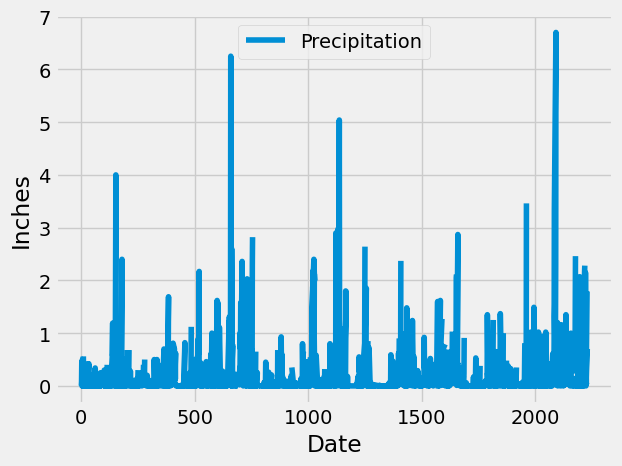

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

date_data = session.query(Measurement.date).\
    filter(func.date(Measurement.date) >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()



# Calculate the date one year from the last date in data set.

    #like oldest or newest date? 

# Perform a query to retrieve the data and precipitation scores

perc_data = session.query(Measurement.date, Measurement.prcp).\
    filter(func.date(Measurement.date) >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

perc_df = pd.DataFrame(perc_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date

percip_df = perc_df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

bar_chart = percip_df.plot()
bar_chart.set_xlabel('Date')
bar_chart.set_ylabel('Inches')

#set xtick labels and ytick labels

bar_chart.set_xlabel('Date')
bar_chart.set_ylabel('Inches')

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data

print(perc_df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

#Maybe come back to this one and use the 'Measurement'

9

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.tobs).\
    filter(func.date(Measurement.date) >= '2016-08-23').filter(Measurement.station == "USC00519281").all()

bins = 12

data = np.array(temp_data)

#Text(0.5, 4.183333333333314, 'Temperature')

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


# Close Session

In [16]:
# Close Session
session.close()